In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score, learning_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [53]:
# Load the breast cancer dataset
df = pd.read_csv("C:/Users/punit/OneDrive/Desktop/ACM-30Days/breast-cancer.csv")
print(df.columns)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Convert target to binary (M=1, B=0)
y = y.map({'M': 1, 'B': 0})

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [55]:
# Initialize SVM model
svm_model = SVC(kernel='rbf', random_state=42, probability=True)

# Set up K-Fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
svm_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=kfold, scoring='roc_auc')

print("SVM Cross-Validation Scores:", svm_scores)
print("Mean AUC:", svm_scores.mean())

SVM Cross-Validation Scores: [0.99947034 0.98767258 0.9989071  0.99602781 0.99247312]
Mean AUC: 0.99491019005533


In [57]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='roc_auc')

print("Random Forest Cross-Validation Scores:", rf_scores)
print("Mean AUC:", rf_scores.mean())

Random Forest Cross-Validation Scores: [0.99470339 0.98939842 0.9989071  0.9908143  0.97983871]
Mean AUC: 0.9907323850648979


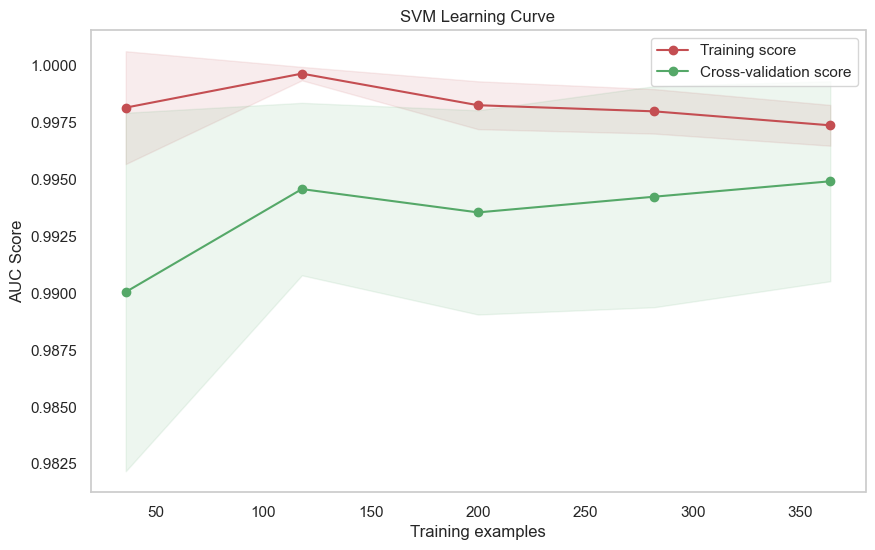

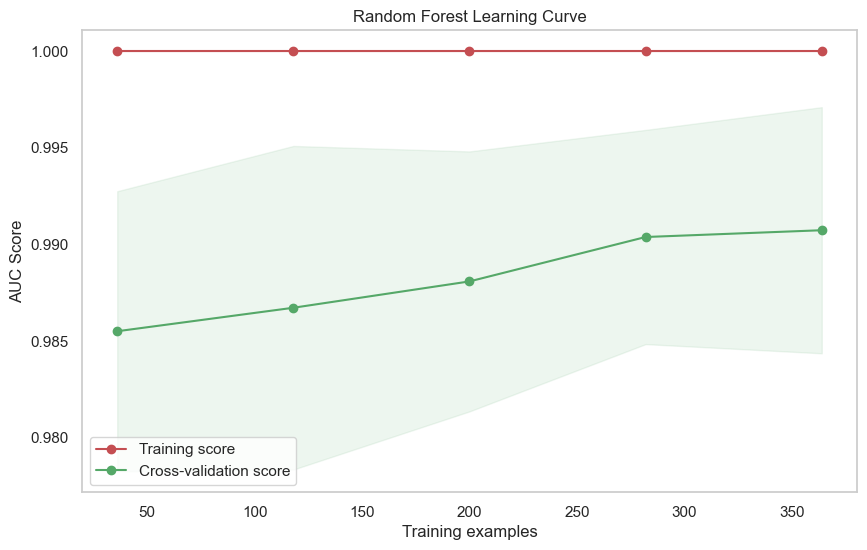

In [64]:
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("AUC Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='roc_auc')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot SVM learning curve
plot_learning_curve(svm_model, "SVM Learning Curve", X_train_scaled, y_train, cv=kfold)
plt.show()

# Plot Random Forest learning curve
plot_learning_curve(rf_model, "Random Forest Learning Curve", X_train, y_train, cv=kfold)
plt.show()